In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('Tesche_Clarke_Plot1.csv', comments = '/*', delimiter = ',')

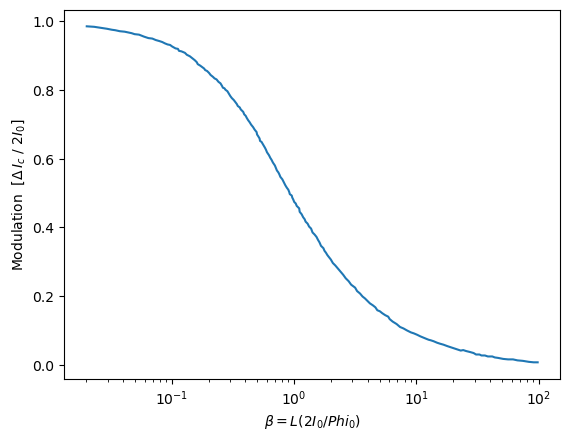

In [3]:
beta = data.T[0]
mod = data.T[1]
plt.plot(beta,mod)


plt.xscale('log')
plt.ylabel('Modulation $\,\, [\Delta\,I_{c}$ / $2I_{0}$]')
plt.xlabel(r'$\beta = L (2I_{0} / Phi_{0})$')
#plt.hlines(0.38,0.1,10)
#plt.vlines(1.41,0.2,0.6)
plt.show()

In [4]:
#mod_low = 5.3
#mod_high = 5.56

#beta_index = np.where((mod>mod_low) & (mod<mod_high))[0]

#beta[beta_index]

In [5]:
#Ic=5.84
#Ic=6.52
#deltaI=7.185   #median
#deltaI=7.73   #max meas
#deltaI=6.09   #min meas
#deltaI=(7.05+6.74)/2   #fabiennes design (mittelwert 2 channel)
#deltaI=7.05   #fabiennes design (max)
#deltaI=6.74   #fabiennes design (min)
phi0 = 2.067e-15
Ic_arr = np.array([6.55,6.49,6.27,6.29,5.7,5.8,5.19,5.88,5.75,5.63,6.07,5.93])
deltaI_arr = np.array([6.74,7.05,7.6,7.73,7.37,6.66,6.09,6.51,7.15,7.32,7.1,7.22])
mod_meas_arr = deltaI_arr/(2*Ic_arr)

beta_arr = np.array([])
for m in range(12):
    beta_index = np.argmin(np.abs(mod-mod_meas_arr[m]))
    beta_arr = np.append(beta_arr,beta[beta_index])
    
def Ls_meas(beta,Ic):
    return beta*phi0/(2*Ic)
    
#print(f'measured deltaI/2Ic = {round(mod_meas,3)}')
#print(f'betaL = {round(beta[beta_index],4)}')
#mod_meas_arr.dtype, test
np.median(Ls_meas(beta_arr,Ic_arr*1e-6)[2:]),Ls_meas(beta_arr,Ic_arr*1e-6)[2:], beta_arr

(1.0825871141813916e-10,
 array([1.02717702e-10, 1.02391096e-10, 9.82434221e-11, 1.26526059e-10,
        1.33704034e-10, 1.33222720e-10, 1.07910341e-10, 9.94649211e-11,
        1.14320253e-10, 1.08607082e-10]),
 array([0.871726, 0.801549, 0.623164, 0.623164, 0.541836, 0.710064,
        0.671431, 0.757958, 0.600372, 0.541836, 0.671431, 0.623164]))

In [6]:
Ls_meas(np.median(beta_arr),5.84)

1.1455170654965754e-16

In [7]:
Mis_arr = phi0/3.385e-6
kis_meas = Mis_arr/np.sqrt(6.4e-9*Ls_meas(beta_arr,Ic_arr*1e-6)[2:])
np.median(kis_meas), np.mean(kis_meas), kis_meas

(0.7336046514540564,
 0.7223989290968112,
 array([0.75312865, 0.75432885, 0.7700875 , 0.6785812 , 0.66011494,
        0.66130631, 0.734785  , 0.76534429, 0.71388824, 0.7324243 ]))

In [8]:
(133-108.26)/133


0.1860150375939849